# **Importing Libraries**

In [4]:
# Importing Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# **Data Collection and Data Processing**

In [5]:
# Loading the Mall Customers Dataset into a Pandas DataFrame.
Mall_Customers_Dataset = pd.read_csv('/content/Mall_Customers_Dataset.csv')

In [6]:
# First 5 Rows of the dataset.
Mall_Customers_Dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Last 5 Rows of the dataset.
Mall_Customers_Dataset.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# Retrieving the General Info of the dataset.
# There are no NaN/Missing Values in the dataset.
Mall_Customers_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# Statistical Measures of the dataset.
Mall_Customers_Dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# **Seperating Important Features for Model Building**

In [12]:
# Combining the Columns "Annual Income (k$)" and "Spending Score (1-100)".
X = Mall_Customers_Dataset.iloc[:, [3, 4]].values

In [13]:
# Print the selected feature values.
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# **Finding the Optimal Number of Clusters using the Elbow Method**

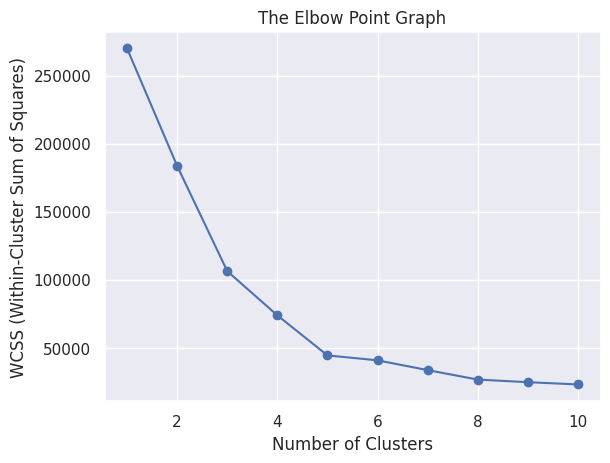

In [14]:
# Initialize an empty list to store WCSS (Within-Cluster Sum of Squares) values.
wcss = []

# Iterate over a range of cluster numbers (1 to 10) to compute WCSS.
for i in range(1, 11):
    # Create a K-Means model with i clusters.
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

    # Fit the model to the dataset.
    kmeans.fit(X)

    # Append the Within-Cluster Sum of Squares (WCSS) to the list.
    # WCSS measures how close the data points are to their cluster centers.
    # Lower WCSS means better clustering, as points are more tightly grouped.
    # kmeans.inertia_ gives the total WCSS (Within-Cluster Sum of Squares).
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters.
sns.set()  # Set the Seaborn style for better visualization.
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')

# Customize the plot with title and labels.
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')

# Display the plot.
plt.show()

**Optimum Number of Clusters are 5.**